# Análisis y automatización de informes

En este apartado vamos importar archivos desde Excel, realizar un análisis mediante la librería pandas, y automatizar la realización de informes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
plt.close("all")

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

Una vez hemos importado todas las librería que necesitamos, lo primero que vamos a hacer es importar un fichero de Excel. En este caso, el fichero lo he descargado de la página de Wikipedia a través del asistente disponible en Excel que nos permite importar tablas desde páginas web.

Pandas contiene una serie de funciones que nos permiten importar ficheros de distintas clases, si ponemos pd.read y a continuación damos a tabulador podemos comprobar que nos permite leer ficheros csv, excel, json, etc. Nos tenemos que asegurar que nuestro archivo python y el archivo que queremos importar se encuentran guardados en el mismo sitio, y a partir de aquí solo debemos indicar el nombre del mismo más la terminación.

Igualmente podemos indicar si tiene encabezados, si queremos que esté indexado por alguna de sus columnas o cualquier otro parametro.


In [6]:
IBEX = pd.read_excel("IBEX.xlsx")

Una vez importado podemos ver nuestro archivo:

In [7]:
IBEX

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93


Mediante info(), podemos saber el nombre de nuestras columnas, y qué tipo de datos forma nuestro archivo. En este caso son 7 columnas, con un total de 35 filas (de la 0 a la 34), siendo entrada y ponderación de tipo númerico, mientras el resto son nombres. 

In [8]:
IBEX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticker       35 non-null     object 
 1   Empresa      35 non-null     object 
 2   Sede         35 non-null     object 
 3   Entrada      35 non-null     int64  
 4   Sector       35 non-null     object 
 5   ISIN         35 non-null     object 
 6   Ponderación  35 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ KB


Continuamos ahora buscando más información de las empresas que componen el Ibex. Ahora vamos a extraer información de sus cotizaciones y vamos a complementar la información que disponemos. 

En primer lugar, generamos una lista con la columna Ticker, que son los simbolos que utiliza Yahoo Finance para realizar publicaciones. 

In [9]:
simbolos = IBEX['Ticker'].tolist() + ['^IBEX']
cotizaciones = yf.download(simbolos, period='3mo', auto_adjust=True)


[*********************100%***********************]  36 of 36 completed


A continuación podemos ver que hemos extraído la información de cotización de las empresas en los últimos 3 meses. Vamos a calcular la Beta de las empresas, y añadir la columna en el DataFrame Ibex

In [10]:
cotizaciones

Close                                                        \
               ACS.MC  ACX.MC     AENA.MC     ALM.MC     AMS.MC      ANA.MC   
Date                                                                          
2021-03-01  26.459999  10.180  141.100006  11.027289  62.099998  135.000000   
2021-03-02  26.450001  10.225  140.500000  10.997673  61.900002  133.100006   
2021-03-03  25.820000  10.100  142.300003  10.958184  60.500000  127.099998   
2021-03-04  26.379999   9.846  142.800003  11.096395  61.500000  126.199997   
2021-03-05  26.090000   9.688  140.399994  11.283968  59.400002  126.000000   
...               ...     ...         ...        ...        ...         ...   
2021-05-24  25.930000  11.705  144.050003  13.880000  60.939999  138.600006   
2021-05-25  25.530001  11.625  142.350006  13.900000  60.639999  139.699997   
2021-05-26  25.350000  11.665  142.449997  13.800000  61.240002  140.899994   
2021-05-27  25.230000  11.750  141.449997  13.810000  61.520000  141.600006   
2021-05-28  25.299999  11.695  143.000000  14.010000  62.000000  141.899994   

                                                  ...  Volume           \
             BBVA.MC BKT.MC   CABK.MC     CIE.MC  ...  PHM.MC   REE.MC   
Date                                              ...                    
2021-03-01  4.549268  5.520  2.411718  22.580000  ...  192153  1483362   
2021-03-02  4.502887  5.544  2.480059  22.360001  ...  190362  1566792   
2021-03-03  4.637095  5.654  2.491944  22.559999  ...  169480  2186070   
2021-03-04  4.611437  5.590  2.469164  22.459999  ...  179644  1619549   
2021-03-05  4.641043  5.610  2.449355  22.559999  ...  179420  2389628   
...              ...    ...       ...        ...  ...     ...      ...   
2021-05-24  5.100000  4.739  2.786000  24.660000  ...   45635   363475   
2021-05-25  5.110000  4.741  2.830000  24.420000  ...   66843  1613813   
2021-05-26  5.084000  4.666  2.791000  24.320000  ...   74706   713502   
2021-05-27  5.143000  4.709  2.849000  24.459999  ...  170505  2477087   
2021-05-28  5.126000  4.680  2.841000  24.559999  ...  124394  1113919   

                                                                               \
              REP.MC    SAB.MC     SAN.MC  SGRE.MC   SLR.MC    TEF.MC  VIS.MC   
Date                                                                            
2021-03-01   9008616  33888618   35794286   640484   721804  14693541  170014   
2021-03-02  10160205  32681558   38527302   970357   790614  10727823   60522   
2021-03-03   8750941  45180790   70166476  1316806  1900343  12240144   67708   
2021-03-04  11381153  39260682   47437353  1668927  1104924  21254866  115330   
2021-03-05  13091915  57610018  123632071  1513600  1732854  15044260  105295   
...              ...       ...        ...      ...      ...       ...     ...   
2021-05-24   2336861  24943959   26447428  2082941   252099  12968682   83859   
2021-05-25   4135719  30404394   33262158  1371935   328496  45388595   47058   
2021-05-26   5802126  34167543   45900643  1212635   552122  36180250   45697   
2021-05-27   6087960  55885597   68738777  1829410  1521024  74845290   93944   
2021-05-28   2864423  80664283   38368295  1080590   772744  14134056   37090   

                       
                ^IBEX  
Date                   
2021-03-01  182097000  
2021-03-02  177712100  
2021-03-03  240923800  
2021-03-04  207044300  
2021-03-05  259819800  
...               ...  
2021-05-24   91842700  
2021-05-25  147285300  
2021-05-26  160831700  
2021-05-27  325441300  
2021-05-28  192320800  

[63 rows x 180 columns]

In [11]:
renta = np.log(1 + cotizaciones.loc[:,'Close'].pct_change()).dropna(how = 'all') #calculamos la rentabilidad
var = renta['^IBEX'].var() #calculamos la varianza del mercado
beta = renta.cov()/var #calculamos la beta con la covarianza de los valores
beta = beta['^IBEX'].head(35).to_frame('Beta') #selecionamos la columna de Ibex, que nos da las Betas de todos los valores, y renombramos la columna
beta = beta.reset_index() #quitamos el índice para convertirlo en columna
beta = beta.rename(columns={'index':'Ticker'}) #renombramos la columna para que coincida con DF Ibex

In [12]:
beta

,Ticker,Beta
0,ACS.MC,1.008623
1,ACX.MC,0.759143
2,AENA.MC,1.194362
3,ALM.MC,0.331165
4,AMS.MC,1.628885
5,ANA.MC,0.498681
6,BBVA.MC,1.640698
7,BKT.MC,1.044428
8,CABK.MC,1.177045
9,CIE.MC,0.616364


In [13]:
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  35 non-null     object 
 1   Beta    35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Vemos que nuestro DF beta contiene 35 filas, con dos columnas, una de ellas es ticker, que coincide con el DF Ibex, que usaremos para unir ambos dataframe.

In [14]:
unir  = pd.merge(IBEX, beta, on='Ticker', how='outer')
unir

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.498681
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,0.759143
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.008623
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.194362
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.331165
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.628885
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.439268
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.400429
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.237311
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.044428


Vamos a añadir ahora el precio del día. Para ello vamos a extraer el dato de la cotización del día, y después lo vamos a añadir a nuestro dataframe.

In [15]:
simbolos = unir['Ticker'].tolist()
cotiza = yf.download(simbolos, period='1d', auto_adjust=True)

[*********************100%***********************]  35 of 35 completed


In [16]:
cotiza = cotiza.loc[:,'Close']#.T#Selecionamos el precio de cierre del día, y trasponemos la columna
cotiza = cotiza.iloc[0] #nos quedamos con la primera fila porque en ocasiones se publican 2 cotizaciones con misma fecha
cotiza = cotiza.reset_index() #quitamos el index, para dejar los ticker como una columna más
cotiza.columns=['Ticker','Precio del día'] #renombramos las columnas
cotiza

,Ticker,Precio del día
0,ACS.MC,25.299999
1,ACX.MC,11.695000
2,AENA.MC,143.000000
3,ALM.MC,14.010000
4,AMS.MC,62.000000
5,ANA.MC,141.899994
6,BBVA.MC,5.126000
7,BKT.MC,4.680000
8,CABK.MC,2.841000
9,CIE.MC,24.559999


In [17]:
cotiza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          35 non-null     object 
 1   Precio del día  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Ahora volemos a unir nuestros dataframe, y podemos comprobar que tenemos incorporado el precio del día.

In [18]:
unido = pd.merge(unir, cotiza, on='Ticker', how="outer")

In [19]:
unido

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta,Precio del día
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.498681,141.899994
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,0.759143,11.695000
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.008623,25.299999
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.194362,143.000000
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.331165,14.010000
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.628885,62.000000
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.439268,26.450001
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.400429,0.631200
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.237311,3.450500
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.044428,4.680000


Podemos convertir nuestro dataframe en una tabla dinámica mediante pivot_table, y comprobamos que utiliza los campos númericos para realizar esta tabla

In [20]:
unido.pivot_table(index = "Ticker")

,Beta,Entrada,Ponderación,Precio del día
Ticker,,,,
ACS.MC,1.008623,1998,1.53,25.299999
ACX.MC,0.759143,2015,0.52,11.695000
AENA.MC,1.194362,2015,3.61,143.000000
ALM.MC,0.331165,2020,0.40,14.010000
AMS.MC,1.628885,2011,4.74,62.000000
ANA.MC,0.498681,2015,1.37,141.899994
BBVA.MC,1.640698,1992,5.12,5.126000
BKT.MC,1.044428,1992,0.93,4.680000
CABK.MC,1.177045,2009,3.70,2.841000


Podemos crear una tabla dinamica asignando distinta información. Index nos marcará la columna de la izquierda, siendo el índice de la tabla dinamica. Columns serán las columnas asignadas, y values serán los valores que queremos ver. Finalmente, para rellenar los huecos vacíos utilizamos fillna(0). 

Esta tabla no nos aporta mucha información, tan solo es n ejemplo de lo que podemos hacer con los datos.

In [21]:
unido.pivot_table(index = "Sede", columns='Entrada', values='Beta').fillna(0)

Entrada,1969,1992,1998,1999,2000,2001,2003,2004,2007,2008,2009,2011,2015,2016,2017,2018,2020
Sede,,,,,,,,,,,,,,,,,
Alcobendas,0.00000,0.000000,0.000000,0.914520,0.377911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498681,0.000000,0.000000,0.000000,0.000000
Alicante,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arteijo,0.00000,0.000000,0.000000,0.000000,0.000000,1.147667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Barcelona,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331165
Bilbao,0.00000,1.143599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.616364,0.000000
Colmenar Viejo,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456022
Luxemburgo,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.439268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Madrid,0.00000,0.754712,1.008623,0.968317,0.000000,0.000000,0.516689,0.000000,0.399374,0.000000,0.000000,1.864007,0.890136,0.340240,0.000000,0.393060,1.856415
Majadahonda,0.00000,0.628002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Medante describe obtenemos los datos estadísticos principales siemple de los datos númericos. 

In [22]:
unido.describe()

,Entrada,Ponderación,Beta,Precio del día
count,35.000000,35.000000,35.000000,35.000000
mean,2005.285714,2.854857,0.912686,27.077405
std,11.942439,3.356235,0.504985,33.935705
min,1969.000000,0.230000,0.195482,0.631200
25%,1995.000000,0.615000,0.477352,7.017000
50%,2008.000000,1.530000,0.771560,16.420000
75%,2015.500000,3.805000,1.215836,26.780001
max,2020.000000,15.250000,2.099130,143.000000


Además podemos usar groupby para agrupar, y luego realizar calculor. En la siguiente línea agrupamos por segmentos y después sumamos las ponderaciones, con ello obtenemos información acerca de los sectores más influyentes en el Ibex35.

In [23]:
sector = unido.groupby('Sector').Ponderación.sum().nlargest(5)
sector

Sector
Electricidad y gas                   22.19
Bancos y cajas de ahorro             18.95
Textil, vestido y calzado            15.25
Telecomunicaciones y otros            7.83
Mineral, metales y transformación     5.75
Name: Ponderación, dtype: float64

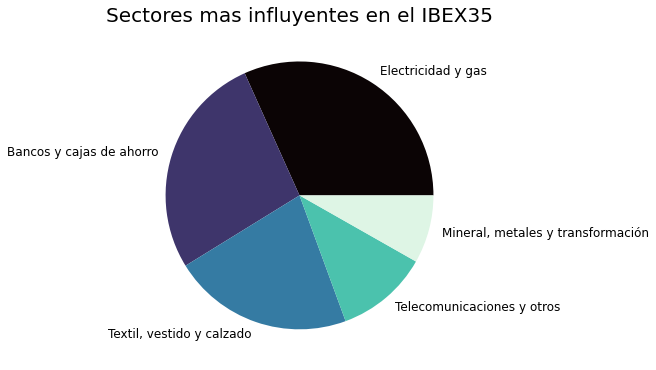

In [24]:
plt.figure(figsize=(6,10))
sector.plot(kind='pie',  subplots=True, fontsize=12, ylabel='', colormap ='mako') #colormap nos permite elegir el color del gráfico
plt.title("Sectores mas influyentes en el IBEX35", fontsize=20)

plt.savefig("Ibex.jpg", bbox_inches='tight') #nos guarda la imagen

plt.show()

Estos son todos los colores que podemos elegir en el gráfico:

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


Podemos hacer también una tabla donde visualizar las ponderaciones del Ibex

In [25]:
Pondera = unido.pivot_table(index = "Sector", values='Ponderación', aggfunc='sum')
Pondera = Pondera.sort_values(by='Ponderación', ascending=False)
Pondera = Pondera.reset_index()
Pondera

,Sector,Ponderación
0,Electricidad y gas,22.19
1,Bancos y cajas de ahorro,18.95
2,"Textil, vestido y calzado",15.25
3,Telecomunicaciones y otros,7.83
4,"Mineral, metales y transformación",5.75
5,Construcción,5.74
6,Transporte y distribución,5.63
7,Electrónica y software,4.97
8,Fabricación y montaje de bienes de equipo,3.91
9,Petróleo,2.99


A su vez, de nuestra tabla, podemos hacer listas que posteriormente utilizaremos en nuestro word para crear una tabla que irá insertada en nuestro documento.

In [26]:
sectores = Pondera['Sector'].tolist()
ponderaciones = Pondera['Ponderación'].tolist()

Podemos hacer un gráfico de barras horizontales con el número de empresas según los sectores que forman el Ibex35.

Realizamos estos gráficos, no tanto por la aportación de información, sino para mostrar las distintas posibilidades que existen a la hora de crear gráficos, y poder compaginar la información.

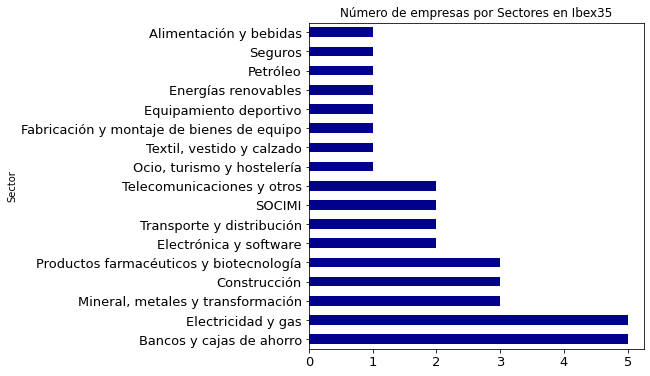

In [27]:
listaEmpresas = unido.groupby('Sector').Empresa.count().sort_values(ascending=False)
listaEmpresas.plot(kind='barh', figsize=(6,6), fontsize=13, color="darkblue")
plt.title("Número de empresas por Sectores en Ibex35")

plt.savefig("NumeroEmpresas.jpg", bbox_inches='tight')

plt.show()

Ahora vamos a hacer un gráfico en el que se muestran las 5 ciudades en las que más empresas del Ibex tienen su sede. Madrid, seguida de Alcobendas y Bilbao contienen el mayor número de empresas.

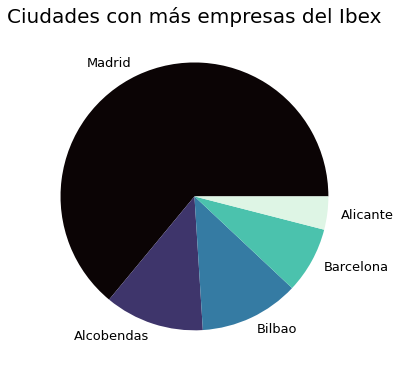

In [28]:
lugar = unido.groupby('Sede').Empresa.count().nlargest(5)
lugar.plot(kind='pie',  subplots=True, figsize=(6,10), fontsize=13, ylabel='', colormap='mako')
plt.title('Ciudades con más empresas del Ibex', fontsize=20)

plt.savefig("Ciudades.jpg", bbox_inches='tight') #es importante guardar la imagen antes de visualizarla, de lo contrario te guarda una imagen en blanco

plt.show()


Por último comprobamos el número de empresas que han entrado a formar parte del Ibex por año

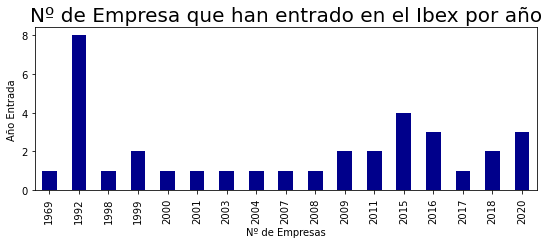

In [29]:
entrada = unido.groupby('Entrada').Empresa.count()
entrada.plot(kind='bar',  subplots=True, figsize=(9,3), fontsize=10, ylabel='', color='darkblue')
plt.title("Nº de Empresa que han entrado en el Ibex por año", fontsize=20)
plt.ylabel('Año Entrada')
plt.xlabel('Nº de Empresas')

plt.savefig("Empresa.jpg", bbox_inches='tight')


plt.show()




In [30]:
simb = simbolos + ['^IBEX']
evolu = yf.download(simb, period='3mo', auto_adjust=True)

[*********************100%***********************]  36 of 36 completed


In [31]:
evolu

Close                                                        \
               ACS.MC  ACX.MC     AENA.MC     ALM.MC     AMS.MC      ANA.MC   
Date                                                                          
2021-03-01  26.459999  10.180  141.100006  11.027289  62.099998  135.000000   
2021-03-02  26.450001  10.225  140.500000  10.997673  61.900002  133.100006   
2021-03-03  25.820000  10.100  142.300003  10.958184  60.500000  127.099998   
2021-03-04  26.379999   9.846  142.800003  11.096395  61.500000  126.199997   
2021-03-05  26.090000   9.688  140.399994  11.283968  59.400002  126.000000   
...               ...     ...         ...        ...        ...         ...   
2021-05-24  25.930000  11.705  144.050003  13.880000  60.939999  138.600006   
2021-05-25  25.530001  11.625  142.350006  13.900000  60.639999  139.699997   
2021-05-26  25.350000  11.665  142.449997  13.800000  61.240002  140.899994   
2021-05-27  25.230000  11.750  141.449997  13.810000  61.520000  141.600006   
2021-05-28  25.299999  11.695  143.000000  14.010000  62.000000  141.899994   

                                                  ...  Volume           \
             BBVA.MC BKT.MC   CABK.MC     CIE.MC  ...  PHM.MC   REE.MC   
Date                                              ...                    
2021-03-01  4.549268  5.520  2.411718  22.580000  ...  192153  1483362   
2021-03-02  4.502887  5.544  2.480059  22.360001  ...  190362  1566792   
2021-03-03  4.637095  5.654  2.491944  22.559999  ...  169480  2186070   
2021-03-04  4.611437  5.590  2.469164  22.459999  ...  179644  1619549   
2021-03-05  4.641043  5.610  2.449355  22.559999  ...  179420  2389628   
...              ...    ...       ...        ...  ...     ...      ...   
2021-05-24  5.100000  4.739  2.786000  24.660000  ...   45635   363475   
2021-05-25  5.110000  4.741  2.830000  24.420000  ...   66843  1613813   
2021-05-26  5.084000  4.666  2.791000  24.320000  ...   74706   713502   
2021-05-27  5.143000  4.709  2.849000  24.459999  ...  170505  2477087   
2021-05-28  5.126000  4.680  2.841000  24.559999  ...  124394  1113919   

                                                                               \
              REP.MC    SAB.MC     SAN.MC  SGRE.MC   SLR.MC    TEF.MC  VIS.MC   
Date                                                                            
2021-03-01   9008616  33888618   35794286   640484   721804  14693541  170014   
2021-03-02  10160205  32681558   38527302   970357   790614  10727823   60522   
2021-03-03   8750941  45180790   70166476  1316806  1900343  12240144   67708   
2021-03-04  11381153  39260682   47437353  1668927  1104924  21254866  115330   
2021-03-05  13091915  57610018  123632071  1513600  1732854  15044260  105295   
...              ...       ...        ...      ...      ...       ...     ...   
2021-05-24   2336861  24943959   26447428  2082941   252099  12968682   83859   
2021-05-25   4135719  30404394   33262158  1371935   328496  45388595   47058   
2021-05-26   5802126  34167543   45900643  1212635   552122  36180250   45697   
2021-05-27   6087960  55885597   68738777  1829410  1521024  74845290   93944   
2021-05-28   2864423  80664283   38368295  1080590   772744  14134056   37090   

                       
                ^IBEX  
Date                   
2021-03-01  182097000  
2021-03-02  177712100  
2021-03-03  240923800  
2021-03-04  207044300  
2021-03-05  259819800  
...               ...  
2021-05-24   91842700  
2021-05-25  147285300  
2021-05-26  160831700  
2021-05-27  325441300  
2021-05-28  192320800  

[63 rows x 180 columns]

In [32]:
evoluci = evolu.loc[:,'Close']
evoluci

,ACS.MC,ACX.MC,AENA.MC,ALM.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,...,PHM.MC,REE.MC,REP.MC,SAB.MC,SAN.MC,SGRE.MC,SLR.MC,TEF.MC,VIS.MC,^IBEX
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,26.459999,10.180,141.100006,11.027289,62.099998,135.000000,4.549268,5.520,2.411718,22.580000,...,114.157272,14.010000,10.705,0.4293,2.894891,31.150000,19.330000,3.6730,57.150002,8378.099609
2021-03-02,26.450001,10.225,140.500000,10.997673,61.900002,133.100006,4.502887,5.544,2.480059,22.360001,...,108.494118,13.865000,10.670,0.4223,2.867627,30.389999,18.459999,3.6980,57.750000,8355.799805
2021-03-03,25.820000,10.100,142.300003,10.958184,60.500000,127.099998,4.637095,5.654,2.491944,22.559999,...,105.314804,13.700000,10.860,0.4348,2.919180,28.740000,17.820000,3.6820,57.400002,8329.299805
2021-03-04,26.379999,9.846,142.800003,11.096395,61.500000,126.199997,4.611437,5.590,2.469164,22.459999,...,102.433548,13.940000,11.040,0.4308,2.916701,28.400000,17.520000,3.7990,58.000000,8354.000000
2021-03-05,26.090000,9.688,140.399994,11.283968,59.400002,126.000000,4.641043,5.610,2.449355,22.559999,...,100.744537,13.910000,10.965,0.4468,2.954375,27.030001,16.299999,3.8540,57.950001,8286.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,25.930000,11.705,144.050003,13.880000,60.939999,138.600006,5.100000,4.739,2.786000,24.660000,...,80.599998,16.264999,11.042,0.6342,3.358500,25.950001,16.410000,4.1650,58.849998,9205.500000
2021-05-25,25.530001,11.625,142.350006,13.900000,60.639999,139.699997,5.110000,4.741,2.830000,24.420000,...,79.900002,16.430000,10.858,0.6510,3.374500,26.549999,16.330000,4.1265,58.700001,9208.700195
2021-05-26,25.350000,11.665,142.449997,13.800000,61.240002,140.899994,5.084000,4.666,2.791000,24.320000,...,79.199997,16.420000,11.070,0.6534,3.354500,26.889999,16.450001,4.1370,58.200001,9196.900391


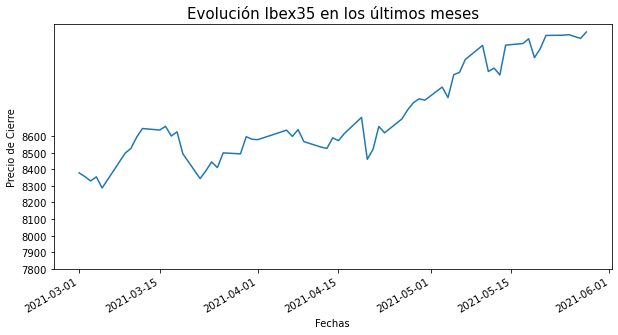

In [33]:
evoluci['^IBEX'].plot(figsize=(10,5));
plt.title('Evolución Ibex35 en los últimos meses', fontsize=15)
plt.ylabel('Precio de Cierre')
plt.xlabel('Fechas')
plt.yticks(range(7800,8700,100));

plt.savefig("Evolucion.jpg", bbox_inches='tight')

plt.show()

In [34]:
evo_media = pd.DataFrame(evoluci.mean())
evo_media.columns = ['Media 3 meses']
medias = evo_media['Media 3 meses'].tolist()
evo_media

,Media 3 meses
ACS.MC,27.040317
ACX.MC,11.203905
AENA.MC,141.371429
ALM.MC,12.681267
AMS.MC,59.669206
ANA.MC,137.784127
BBVA.MC,4.629067
BKT.MC,5.379778
CABK.MC,2.607324
CIE.MC,23.210159


In [35]:
evo_destip = evoluci.std().sort_values(ascending=False)
mayores = evo_destip.nlargest(5)
mayores = pd.DataFrame(mayores)
mayores.columns = ['Desviación Típica']
mayores

,Desviación Típica
^IBEX,280.098735
PHM.MC,8.616374
ANA.MC,5.011993
AENA.MC,4.136616
FDR.MC,3.566720


In [36]:
mayor = mayores['Desviación Típica'].tolist()  #para luego insertar una tabla en word
empr = ['Ibex', 'PHM', 'ANA', 'AENA', 'AMS']

In [37]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


Vamos a crear ahora un informe en Word automatizado para que guarde nuestras imagenes

In [38]:
from docx import Document
from docx import shared
from docx.shared import Cm
from docx.shared import Pt

In [39]:
print(dir(shared))

['Cm', 'ElementProxy', 'Emu', 'Inches', 'Length', 'Mm', 'Parented', 'Pt', 'RGBColor', 'Twips', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'absolute_import', 'lazyproperty', 'print_function', 'unicode_literals', 'write_only_property']


In [40]:
document = Document()
document.add_heading("ANÁLISIS DE IBEX_35", level=0)
document.add_heading("1. Características del Ibex35", level=1)
document.add_paragraph("El Ibex se compone de las 35 empresas con más liquidez que cotizan en el sistema bursátil español que está formado por las bolsas de Madrid, Valencia, Barcelona y Bilbao. Por ello se utiliza como referencia para conocer la situación de la Bolsa española.")
document.add_paragraph("Si comprobamos la distribución por sectores, podemos comprobar que Electricidad y Gas es el sector más representativo, ya que supone un 22% del Ibex, seguido de la Banca, Textil y calzado, Telecomunicaciones y Minerales-transformación.")

document.add_picture("Ibex.jpg", width=Cm(11))

document.add_paragraph("El gráfico nos muestra los 5 sectores más representativos, siendo un total de 17 sectores los que están representados en el Ibex.35")
document.add_paragraph("En la siguiente tabla comprobamos la distribución por sectores del Ibex")

table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 1')
#font = row_cells[0].text
table.height = Pt(8)

table.rows[0].cells[0].text = 'Sectores'
table.rows[0].cells[1].text = 'Ponderación'

for i,p  in zip(sectores, ponderaciones):
    row_cells = table.add_row().cells
    row_cells[0].text = i
    row_cells[1].text = str(round(p,2)) + '%'
    
document.add_paragraph("")
document.add_paragraph("En el siguiente gráfico podemos comprobar el número de empresas totales por sector")    
document.add_picture("NumeroEmpresas.jpg", width=Cm(10), height=Cm(8))

document.add_paragraph('')
document.add_paragraph('En el siguiente gráfico vemos las 5 ciudades donde más empresas tienen sus sedes.')
document.add_picture("Ciudades.jpg", width=Cm(7))
document.add_paragraph("""Madrid es la ciudad donde más empresas tienen su sede, seguido de Alcobendas y Bilbao. Después le siguen Barcelona y Alicante. 
Posiblemente podemos encontrar distintos motivos por los que la empresas deciden establecer su sede en un punto geográfico y no otro, así las infraestructuras, la innovación tecnológica o su capital humano son factores que influyen a la hora de establecer la sede de una empresa.""")

document.add_paragraph('El Ibex se creó en 1.992, por ello no es de extrañar que nos encontremos con el año en el que más entradas se produjeron en el Ibex.')
document.add_paragraph('En el siguiente gráfico podemos ver el número de entradas por año.')
document.add_picture('Empresa.jpg', width=Cm(12))
document.add_paragraph('Podemos ver una entrada en el año 1969, que probablemente sea un error publicado en la fuente de origen de los datos, Wikipedia, puesto que la creación del Ibex fue en 1.992, y por tanto el año 1969 debe ser el año de creación de la propia empresa.')      

document.add_heading("2. Análisis evolución Ibex 35", level=1)
document.add_paragraph("En el siguiente gráfico podemos ver la evolución del Ibex 35 de los últimos 3 meses")
document.add_picture("Evolucion.jpg", width=Cm(12))
document.add_paragraph("La tendencia, después de meses marcados por pérdidas debido al coronavirus, es alcista. Parece que las previsiones económicas en 2021 establecen recuperaciones económicas tanto para Europa como para España, lo que inyecta confianza en los inversores.")
document.add_paragraph("Esto se ve reflejado en las subidas experimentadas en el Ibex a lo largo de estos meses.")

document.add_paragraph("En la siguiente tabla podemos comprobar el precio de medio de los últimos 3 meses")
table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 1')
table.height = Pt(8)

table.rows[0].cells[0].text = 'Empresas'
table.rows[0].cells[1].text = 'Precio medio 3 meses'

for s,m  in zip(simbolos, medias):
    row_cells = table.add_row().cells
    row_cells[0].text = s
    row_cells[1].text = str(round(m,2)) + '€'
    
document.add_paragraph('')
document.add_paragraph("No todos los valores sufren las mismas variaciones. Para saber si los valores oscilan mucho en precios, podemos calcular la desviación típica que nos dará una idea de cómo han variado en precio durante los últimos 3 meses.")


document.add_paragraph('') 
document.add_paragraph('')

document.add_paragraph("En la siguiente tabla, podemos ver la variación del Ibex en primer lugar, seguido de los 4 valores que más variaciones han sufrido en estos meses:")

table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 1')
table.height = Pt(8)

table.rows[0].cells[0].text = 'Empresas'
table.rows[0].cells[1].text = 'Variacion típica en 3 meses'

for s,m  in zip(empr, mayor):
    row_cells = table.add_row().cells
    row_cells[0].text = s
    row_cells[1].text = str(round(m,2))
    
document.save('Ibex.docx')

Con esto hemos comprobado que podemos hacer un informe totalmente automatizacido.